Problem 1.4 (Page 34）
In Exercise 1.4, we use an artificial data set to study the perceptron learning algorithm . This problem leads you to explore the algorithm further with data sets of different sizes and dimensions.
(a) Generate a linearly separable data set of size 20 as indicated in Exercise 1.4. Plot the examples $\{ (x_n , y_n) \}$ as well as the target function $f$ on a plane. Be sure to mark the examples from different classes differently, and add labels to the axes of the plot.
(b) Run the perceptron learning algorithm on the data set above. Report the number of updates that the algorithm takes before converging. Plot the examples $\{ (x_n , y_n) \}$ , the target function f, and the final hypothesis g in the same figure. Comment on whether f is close to g.
(c) Repeat everything in (b) with another randomly generated data set of size 20. Compare your results with (b) .
(d) Repeat everything in (b) with another randomly generated data set of size 100. Compare your results with (b) .
(e) Repeat everything in (b) with another randomly generated data set of size 1, 000. Compare your results with (b) .
(f) Modify the algorithm such that it takes $x_n\in R^{10}$ instead of $R^2$ . Randomly generate a linearly separable data set of size 1, 000 with $x_n\in R^{10}$ and feed the data set to the algorithm. How many updates does the algorithm take to converge?
(g) Repeat the algorithm on the same data set as (f) for 100 experiments. In the iterations of each experiment, pick $x(t)$ randomly instead of deterministically. Plot a histogram for the number of updates that the algorithm takes to converge.
(h) Summarize your conclusions with respect to accuracy and running time as a function of $N$ and $d$.

/Users/wang/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


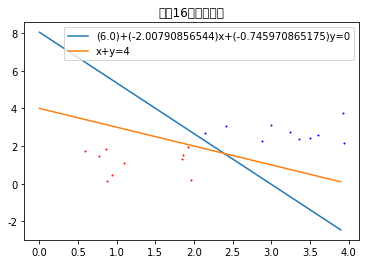

In [2]:
# -*- coding: utf-8 -*-
import random
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

#定义一个函数f(n),用来生成2n个binary线性可分的数据,并对这2n个数据运行perceptron算法，并画图
def f(n):
    #首先生成2n个可分的数据，生成两组，每一组有n个点，第一组点的每个分量属于[0,2]且label为1,第二组点的每个分量属于[2,4]且label为2,目标函数取x+y=4
    #第一组label为1的n个点
    X1=[]
    Y1=[]
    #第二组label为2的n个点
    X2=[]
    Y2=[]
    for i in range(n):
        X1.append(random.uniform(0,2))
        Y1.append(random.uniform(0,2))
        X2.append(random.uniform(2,4))
        Y2.append(random.uniform(2,4))
        
    #生成数据列表，每个元素都是一个数组，其中第一个分量为1，第二三分量分别为第一第二维度的坐标数值，第四分量为label。
    data1 = [np.array([1,X1[i],Y1[i],1]) for i in range(n)]
    data2 = [np.array([1,X2[i],Y2[i],-1]) for i in range(n)]
    data = data1 + data2
    random.shuffle(data)
    
    #定义sign函数，用来判断正负
    def sign(x):
        if x>=0:
            return 1
        else:
            return -1
        
    #定义判别函数，判断所有数据是否分类完成
    def Judge(x,w):
        flag=1
        for i in x:
            if sign(i[:3].dot(w))*i[-1]<0:
                flag=0
                break
        return flag
    #记录次数
    s=0
    #初始化w=[0,0,0]
    w=np.array([0,0,0],dtype=float)
    while (Judge(data,w)==0):
        i=data[random.randint(0,2*n-1)]
        if sign(i[:3].dot(w))*i[-1]<0:
            w+=i[:3]*i[-1]
            s+=1
        
    #直线方程g为w0+w1*x+w2*y=0,根据此生成点
    X3=np.arange(0,4,0.1)
    Y3=np.array([(X3[i]*w[1]+w[0])/(-w[2]) for i in range(len(X3))])

    #目标函数f为x+y=4
    X4=np.arange(0,4,0.1)
    Y4=4-X4

    #画出图片
    plt.scatter(X1,Y1,c='r',s=1)
    plt.scatter(X2,Y2,c='b',s=1)
    plt.plot(X3,Y3,label="("+str(w[0])+")+("+str(w[1])+")x+("+str(w[2])+")y=0")
    plt.plot(X4,Y4,label="x+y=4")
    plt.title(u"经过"+str(s)+u"次迭代收敛")
    plt.legend()
    plt.show()

f(10)

/Users/wang/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


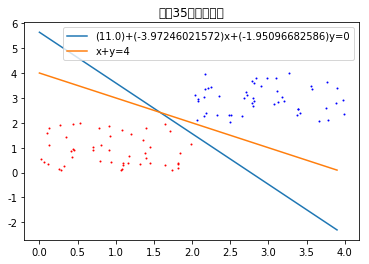

In [3]:
f(50)

/Users/wang/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


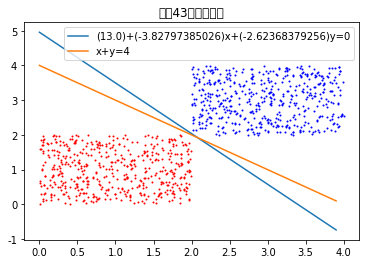

In [4]:
f(500)

(f)接下来把数据改为R10

In [5]:
# -*- coding: utf-8 -*-
import random
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

#定义函数g(n,m),生成2n个m维数据点
def g(n,m):
    #首先生成2n个可分的数据，生成两组，每一组有n个点，第一组点的每个分量属于[1,3],第二组点的每个分量属于[5,9],
    #第一组数据的标记为1，第二组的标记为-1,注意添加第一个分量为1
    #第一组点
    data1=[]
    #第二组点
    data2=[]
    for i in range(n):
        x1=[1]
        x2=[1]
        for j in range(m):
            x1.append(random.uniform(1,3))
            x2.append(random.uniform(5,9))
        x1.append(1)
        x2.append(-1)
        data1.append(np.array(x1))
        data2.append(np.array(x2))
    data=data1+data2
    #打乱数据顺序
    random.shuffle(data)
    
    #定义sign函数判断正负
    def sign(x):
        if x>=0:
            return 1
        else:
            return -1
        
    #定义判别函数，判断所有数据是否分类完成
    def Judge(x,w):
        flag=1
        for i in x:
            if sign(i[:m+1].dot(w))*i[-1]<0:
                flag=0
                break
        return flag
    
    #记录次数
    s=0
    #初始化w
    w=np.zeros(m+1)
    while (Judge(data,w)==0):
        i=data[random.randint(0,2*n-1)]
        if sign(i[:m+1].dot(w))*i[-1]<0:
            w+=i[-1]*i[:m+1]
            s+=1
    return s
print("迭代次数为"+str(g(500,10)))

迭代次数为110


(g)重复(f)100次，做出直方图

In [ ]:
x=[]
for i in range(100):
    x.append(g(500,10))
plt.hist(x,20,normed=True)
plt.xlabel("迭代次数")
plt.show()